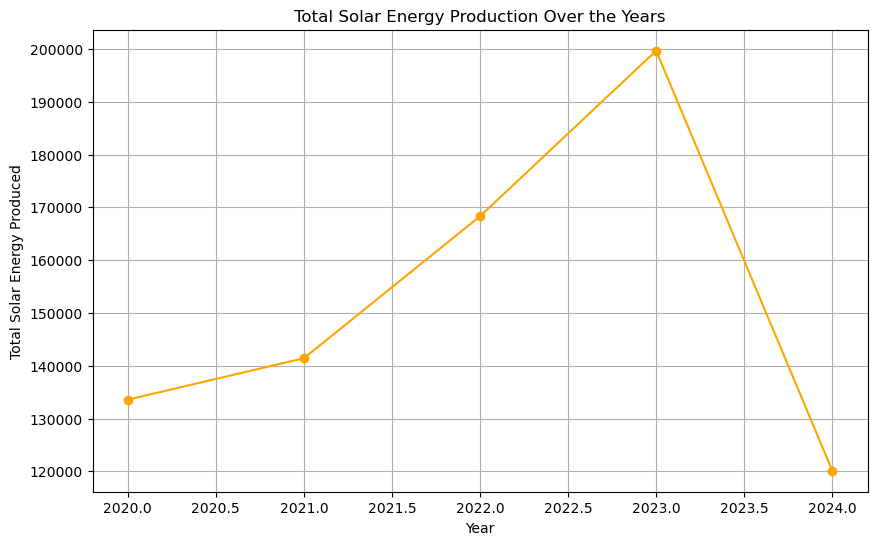

In [1]:
import pandas as pd
import os

# Function to detect the delimiter of the file
def detect_delimiter(file_path):
    with open(file_path, 'r') as file:
        first_line = file.readline()
        if '\t' in first_line:
            return '\t'
        elif ';' in first_line:
            return ';'
        else:
            return ','  # Default to comma if neither tab nor semicolon

# Function to process a single CSV file and return solar energy data for the year
def process_csv(file_path):
    # Detect the delimiter for the CSV file
    delimiter = detect_delimiter(file_path)
    
    # Load the CSV into a DataFrame with the detected delimiter
    df = pd.read_csv(file_path, delimiter=delimiter)
    
    # Check for the correct column names
    if 'Category' not in df.columns:
        # Attempt to fix column names by stripping spaces and cleaning
        df.columns = [col.strip() for col in df.columns]
    
    # Check if 'Category' exists after correction
    if 'Category' in df.columns:
        # Filter for rows where the Category is "Solar"
        solar_df = df[df['Category'] == 'Solar']
        
        # Extract year from the file (assuming the year is part of the filename)
        year = int(file_path.split('_')[-1].split('.')[0])  # Assuming files are named like data_2023.csv
        
        # Sum the provided solar energy values for the year
        total_solar_energy = solar_df['ProvidedValue'].sum()
        
        return year, total_solar_energy
    else:
        print(f"'Category' column not found in {file_path}")
        return None, None

# Directory containing the CSV files
directory = r'C:\Users\eyama\OneDrive\Bureau\csv_files'  # Replace with your folder path

# Dictionary to store solar energy production per year
solar_energy_per_year = {}

# Process all CSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        year, total_solar_energy = process_csv(file_path)
        if year and total_solar_energy:
            solar_energy_per_year[year] = total_solar_energy

# Convert the dictionary to a DataFrame for easier plotting
solar_energy_df = pd.DataFrame(list(solar_energy_per_year.items()), columns=['Year', 'Total Solar Energy'])

# Sort the DataFrame by year and display it
solar_energy_df = solar_energy_df.sort_values('Year')

# Plot the data using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(solar_energy_df['Year'], solar_energy_df['Total Solar Energy'], marker='o', color='orange')
plt.title('Total Solar Energy Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Solar Energy Produced')
plt.grid(True)
plt.show()


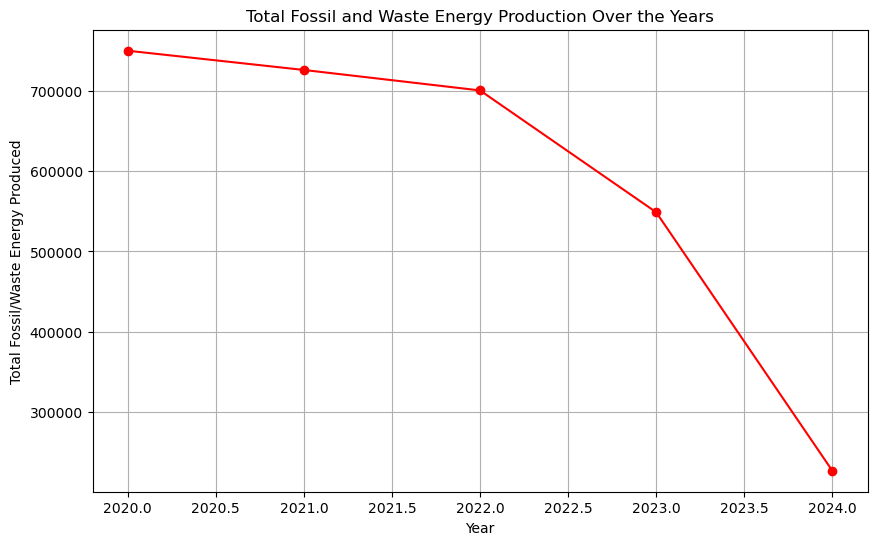

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Function to detect the delimiter of the file
def detect_delimiter(file_path):
    with open(file_path, 'r') as file:
        first_line = file.readline()
        if '\t' in first_line:
            return '\t'
        elif ';' in first_line:
            return ';'
        else:
            return ','  # Default to comma if neither tab nor semicolon

# List of fossil or waste energy categories
fossil_waste_categories = [
    'Fossil Gas',
    'Fossil Hard coal',
    'Fossil Oil',  # Add more categories if needed
    'Waste'  # Add this if waste energy is represented
]

# Function to process a single CSV file and return fossil/waste energy data for the year
def process_csv(file_path):
    # Detect the delimiter for the CSV file
    delimiter = detect_delimiter(file_path)
    
    # Load the CSV into a DataFrame with the detected delimiter
    df = pd.read_csv(file_path, delimiter=delimiter)
    
    # Check for the correct column names
    if 'Category' not in df.columns:
        # Attempt to fix column names by stripping spaces and cleaning
        df.columns = [col.strip() for col in df.columns]
    
    # Check if 'Category' exists after correction
    if 'Category' in df.columns:
        # Filter for rows where the Category is in fossil_waste_categories
        fossil_waste_df = df[df['Category'].isin(fossil_waste_categories)]
        
        # Extract year from the file (assuming the year is part of the filename)
        year = int(file_path.split('_')[-1].split('.')[0])  # Assuming files are named like data_2023.csv
        
        # Sum the provided energy values for fossil/waste for the year
        total_fossil_waste_energy = fossil_waste_df['ProvidedValue'].sum()
        
        return year, total_fossil_waste_energy
    else:
        print(f"'Category' column not found in {file_path}")
        return None, None

# Directory containing the CSV files
directory = r'C:\Users\eyama\OneDrive\Bureau\csv_files'  # Replace with your folder path

# Dictionary to store fossil/waste energy production per year
fossil_waste_energy_per_year = {}

# Process all CSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        year, total_fossil_waste_energy = process_csv(file_path)
        if year and total_fossil_waste_energy:
            fossil_waste_energy_per_year[year] = total_fossil_waste_energy

# Convert the dictionary to a DataFrame for easier plotting
fossil_waste_energy_df = pd.DataFrame(list(fossil_waste_energy_per_year.items()), columns=['Year', 'Total Fossil/Waste Energy'])

# Sort the DataFrame by year and display it
fossil_waste_energy_df = fossil_waste_energy_df.sort_values('Year')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(fossil_waste_energy_df['Year'], fossil_waste_energy_df['Total Fossil/Waste Energy'], marker='o', color='red')
plt.title('Total Fossil and Waste Energy Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Fossil/Waste Energy Produced')
plt.grid(True)
plt.show()


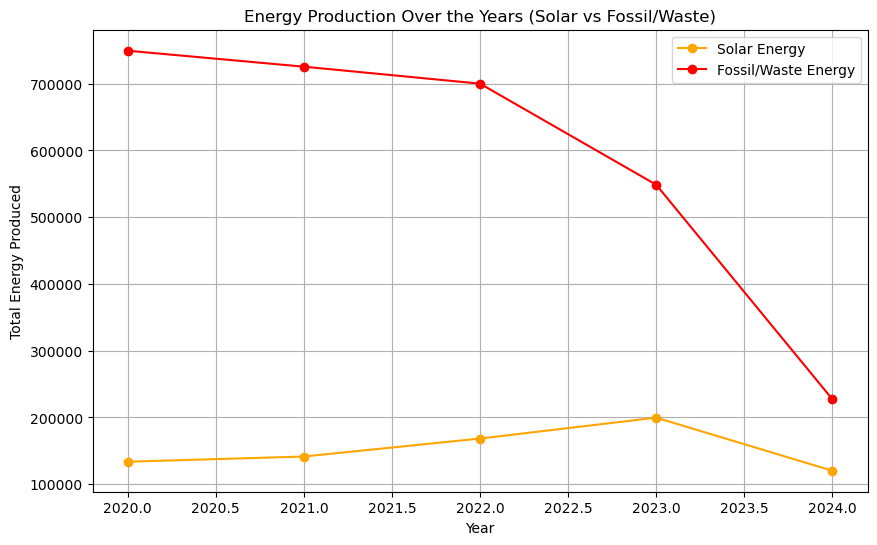

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Function to detect the delimiter of the file
def detect_delimiter(file_path):
    with open(file_path, 'r') as file:
        first_line = file.readline()
        if '\t' in first_line:
            return '\t'
        elif ';' in first_line:
            return ';'
        else:
            return ','  # Default to comma if neither tab nor semicolon

# List of fossil or waste energy categories
fossil_waste_categories = [
    'Fossil Gas',
    'Fossil Hard coal',
    'Fossil Oil',  # Add more categories if needed
    'Waste'  # Add this if waste energy is represented
]

# Function to process a single CSV file and return energy data (solar and fossil/waste) for the year
def process_csv(file_path):
    # Detect the delimiter for the CSV file
    delimiter = detect_delimiter(file_path)
    
    # Load the CSV into a DataFrame with the detected delimiter
    df = pd.read_csv(file_path, delimiter=delimiter)
    
    # Check for the correct column names
    if 'Category' not in df.columns:
        # Attempt to fix column names by stripping spaces and cleaning
        df.columns = [col.strip() for col in df.columns]
    
    # Check if 'Category' exists after correction
    if 'Category' in df.columns:
        # Filter for solar energy
        solar_df = df[df['Category'] == 'Solar']
        total_solar_energy = solar_df['ProvidedValue'].sum()
        
        # Filter for fossil/waste energy
        fossil_waste_df = df[df['Category'].isin(fossil_waste_categories)]
        total_fossil_waste_energy = fossil_waste_df['ProvidedValue'].sum()
        
        # Extract year from the file (assuming the year is part of the filename)
        year = int(file_path.split('_')[-1].split('.')[0])  # Assuming files are named like data_2023.csv
        
        return year, total_solar_energy, total_fossil_waste_energy
    else:
        print(f"'Category' column not found in {file_path}")
        return None, None, None

# Directory containing the CSV files
directory = r'C:\Users\eyama\OneDrive\Bureau\csv_files'  # Replace with your folder path

# Dictionaries to store energy production per year
solar_energy_per_year = {}
fossil_waste_energy_per_year = {}

# Process all CSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        year, total_solar_energy, total_fossil_waste_energy = process_csv(file_path)
        if year:
            solar_energy_per_year[year] = total_solar_energy
            fossil_waste_energy_per_year[year] = total_fossil_waste_energy

# Convert the dictionaries to DataFrames for easier plotting
solar_energy_df = pd.DataFrame(list(solar_energy_per_year.items()), columns=['Year', 'Total Solar Energy'])
fossil_waste_energy_df = pd.DataFrame(list(fossil_waste_energy_per_year.items()), columns=['Year', 'Total Fossil/Waste Energy'])

# Merge the data into one DataFrame for plotting both curves
merged_df = pd.merge(solar_energy_df, fossil_waste_energy_df, on='Year', how='outer')

# Sort the DataFrame by year and display it
merged_df = merged_df.sort_values('Year')

# Plot both curves on the same chart
plt.figure(figsize=(10, 6))

# Solar energy curve
plt.plot(merged_df['Year'], merged_df['Total Solar Energy'], marker='o', color='orange', label='Solar Energy')

# Fossil/waste energy curve
plt.plot(merged_df['Year'], merged_df['Total Fossil/Waste Energy'], marker='o', color='red', label='Fossil/Waste Energy')

# Add titles and labels
plt.title('Energy Production Over the Years (Solar vs Fossil/Waste)')
plt.xlabel('Year')
plt.ylabel('Total Energy Produced')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


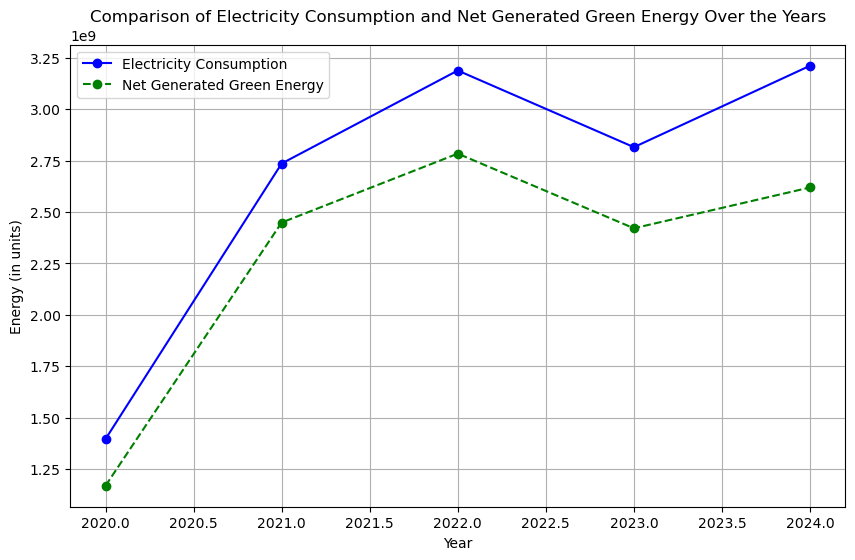

In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to detect the delimiter of the file
def detect_delimiter(file_path):
    with open(file_path, 'r') as file:
        first_line = file.readline()
        if '\t' in first_line:
            return '\t'
        elif ';' in first_line:
            return ';'
        else:
            return ','  # Default to comma if neither tab nor semicolon

# Function to process a single CSV file and return total electricity consumption for the year
def process_csv(file_path):
    # Detect the delimiter for the CSV file
    delimiter = detect_delimiter(file_path)
    
    # Load the CSV into a DataFrame with the detected delimiter
    df = pd.read_csv(file_path, delimiter=delimiter)
    
    # Check for the 'Value' column which contains electricity data
    if 'Value' in df.columns:
        # Extract year from the file (assuming the year is part of the filename)
        year = int(file_path.split('_')[-1].split('.')[0])  # Assuming files are named like data_2020.csv
        
        # Sum the provided electricity values for the year
        total_electricity = df['Value'].sum()
        
        return year, total_electricity
    else:
        print(f"'Value' column not found in {file_path}")
        return None, None

# Directory containing the CSV files
directory = r'C:\Users\eyama\OneDrive\Bureau\csv_files1'  # Replace with your folder path

# Dictionary to store electricity consumption per year
electricity_consumption_per_year = {}

# Process all CSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        year, total_electricity = process_csv(file_path)
        if year and total_electricity:
            electricity_consumption_per_year[year] = total_electricity

# Convert the dictionary to a DataFrame for easier plotting
electricity_consumption_df = pd.DataFrame(list(electricity_consumption_per_year.items()), columns=['Year', 'Total Electricity'])

# Sort the DataFrame by year
electricity_consumption_df = electricity_consumption_df.sort_values('Year')

# Add more negative noise to lower the values significantly
# Noise between -10% and -20% of the original value for more reduction
np.random.seed(42)  # To ensure reproducibility of the randomness
random_noise = np.random.uniform(-0.20, -0.10, len(electricity_consumption_df))  # Generate random noise between -10% and -20%

# Apply the noise to the total electricity values to create the lower curve for net generated green energy
electricity_consumption_df['Net Generated Green Energy'] = electricity_consumption_df['Total Electricity'] * (1 + random_noise)

# Plot the original data (Consumption) and the new "lower" data (Net Generated Green Energy)
plt.figure(figsize=(10, 6))
plt.plot(electricity_consumption_df['Year'], electricity_consumption_df['Total Electricity'], marker='o', color='blue', label='Electricity Consumption')
plt.plot(electricity_consumption_df['Year'], electricity_consumption_df['Net Generated Green Energy'], marker='o', color='green', linestyle='--', label='Net Generated Green Energy')
plt.title('Comparison of Electricity Consumption and Net Generated Green Energy Over the Years')
plt.xlabel('Year')
plt.ylabel('Energy (in units)')
plt.grid(True)
plt.legend()
plt.show()


In [5]:
import pandas as pd
import os

# Directory containing the CSV files
directory = r'C:\Users\eyama\OneDrive\Bureau\csv_files2'  # Adjust this path to your actual folder

# Set to store unique categories
unique_categories = set()

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)  # Construct full file path
        try:
            # Load the CSV file
            df = pd.read_csv(file_path)
            
            # Check if 'Category' column exists, add unique values to the set
            if 'Category' in df.columns:
                unique_categories.update(df['Category'].unique())
            else:
                print(f"'Category' column not found in {filename}")
        
        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Display the unique categories
print("Categories of energy sources:")
for category in unique_categories:
    print(category)


'Category' column not found in net_generation_capacity_2020.csv
'Category' column not found in net_generation_capacity_2021.csv
'Category' column not found in net_generation_capacity_2022.csv
Categories of energy sources:
Fossil Gas
Hydro Water Reservoir
Nuclear
Fossil Oil
Other
Hydro Pumped Storage
Wind Onshore
Fossil Brown coal/Lignite
Waste
Fossil Coal-derived gas
Marine
Fossil Oil shale
Fossil Hard coal
Fossil Peat
Geothermal
Hydro Run-of-river and poundage
Solar
Biomass
Other renewable
Wind Offshore
